In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [4]:
matches=pd.read_csv('matches.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [5]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [6]:
matches['winner'].fillna('Draw', inplace=True)

In [7]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [52]:
matches[pd.isnull(matches['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [50]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,team1,team2,city,toss_decision,toss_winner,venue,winner
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,13.836478,0.570755,5.371069,17.388365,5.309748
std,3.329169,3.341677,8.322533,0.495358,3.293140,9.550782,3.288726
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.000000,3.000000,7.000000,0.000000,2.000000,8.000000,2.000000
50%,5.000000,5.000000,14.000000,1.000000,5.000000,15.000000,5.000000
75%,9.000000,8.000000,22.000000,1.000000,7.250000,24.000000,8.000000
max,13.000000,13.000000,30.000000,1.000000,13.000000,34.000000,14.000000


In [10]:
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [11]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [12]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,5.309748
std,3.329169,3.341677,3.293140,3.288726
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.250000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [13]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


[]

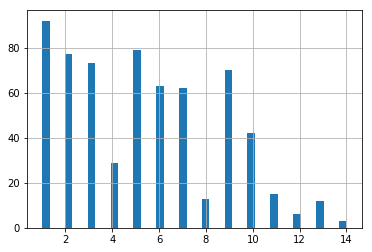

In [15]:
df['winner'].hist(bins=40).plot()

Text(0.5,1,'Match winners')

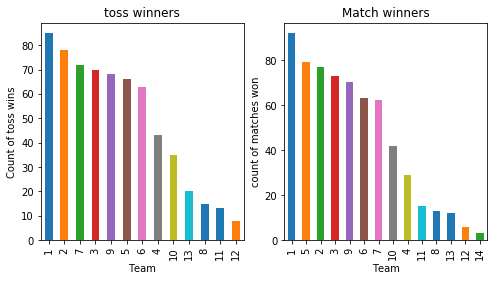

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [17]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [18]:
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [19]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

C:\Python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)


Accuracy : 23.270%
Cross-Validation Score : 21.852%


C:\Python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2


In [23]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Python36\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy : 89.151%


C:\Python36\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Python36\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Python36\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Python36\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Python36\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Cross-Validation Score : 48.903%


In [24]:
df.head(7)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2
3,11,9,15,1,9,11,9
4,3,7,2,0,3,14,3
5,8,10,14,1,10,23,10
6,2,1,22,1,1,34,1


KKR


In [60]:
team1='CSK'
team2='KXIP'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'14','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

CSK


In [27]:
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.250591
team1            0.221472
toss_winner      0.174228
venue            0.169812
city             0.151185
toss_decision    0.032711
dtype: float64


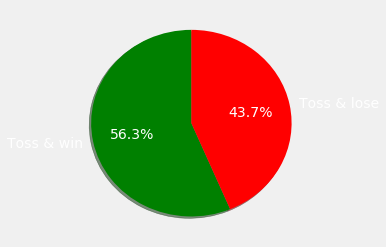

In [48]:
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
fig = mlt.gcf()
fig.set_size_inches(4,4)
mlt.show()

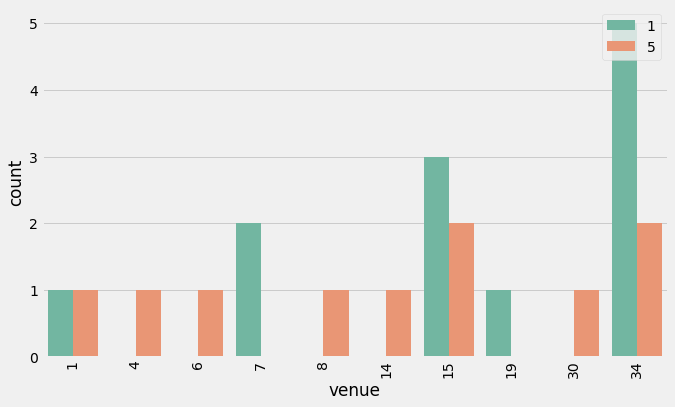

In [29]:
import seaborn as sns
team1=dicVal['MI']
team2=dicVal['CSK']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set2')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

In [62]:
le.classes_[7]

'Eden Gardens'